<a href="https://colab.research.google.com/github/CobaMasa/PythonMachineLearningProgramming/blob/master/chapter3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modules

In [0]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc = StandardScaler()
iris = load_iris()
X = iris.data[:, [2, 3]]
X_std = sc.fit_transform(X)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3)

In [0]:
# plot_decision_regions
## Improving plot decision regions
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test test')

# Decision Tree
*Concept*

Wanna make it maximize...
\begin{eqnarray}
    IG(D_p, x_i) &=& I(D_p) -\sum_{j=1}^J \frac{N_j}{N_p}I(D_j)\\
    &s.t& \sum_{j=1}^J N_j = N_p
\end{eqnarray}
$D_p$: Data in Parent Node

$x_i$: Explanatory Variable i

$N_j$: Sample size of child node

$I(D_j)$: Impulity of child node j

In making decision tree, 3 types of Impulity function below are usually applied.

1. Entropy

    $$I_H(j)=-\sum_{k=1}^Kp(k|j)log_2p(k|j)$$

2. Gini Impulity

    \begin{eqnarray}
        I_G(j) &=& \sum_{k=1}^Kp(k|j)(1-p(k|j))\\
        &=&1 - \sum_{k=1}^Kp(k|j)^2
    \end{eqnarray}

3. Classification Error

    $$I_E(j)=1 - \mbox{max } p(k|j)$$

$K$: The size of the labels

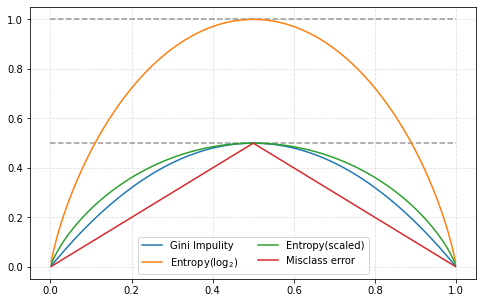

In [3]:
# Plot impulity curve (considering spliting with binary)
def entropy(p):
    return -(p*np.log2(p)+(1-p)*np.log2(1-p))

def gini(p):
    return p*(1-p) + (1-p)*p

def error(p):
    return 1 - np.max([p, 1-p])

x = np.linspace(0, 1, 500)[1:-1]
fig = plt.figure(figsize=(8, 5))

plt.plot(x, gini(x), label='Gini Impulity')
plt.plot(x, entropy(x), label='Entropy($\log_2$)')
plt.plot(x, 0.5*entropy(x), label='Entropy(scaled)')
plt.plot(x, [error(i) for i in x], label='Misclass error')

plt.legend(loc='lower center', ncol=2)
plt.hlines(1.0, 0, 1, ls='--', alpha=0.8, color='gray')
plt.hlines(0.5, 0, 1, ls='--', alpha=0.8, color='gray')
plt.grid(alpha=0.4, ls='--')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


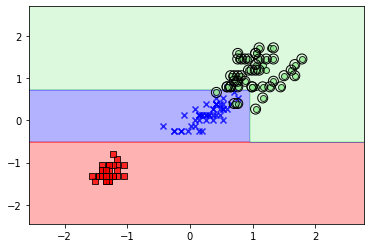

In [4]:
# Decision tree with Gini Impulity
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, criterion='gini')
tree.fit(X_train, y_train)
plot_decision_regions(X_std, y, classifier=tree, test_idx=range(105, 150));

In [5]:
# Oupput the result as an image (graphviz & pyparsing are installed in colab as default)
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    tree, 
    filled=True,
    rounded=True,
    class_names=['Setosa', 'Versicolor', 'Virginica'],
    feature_names=['petal length', 'petal width'],
    out_file=None
    )
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

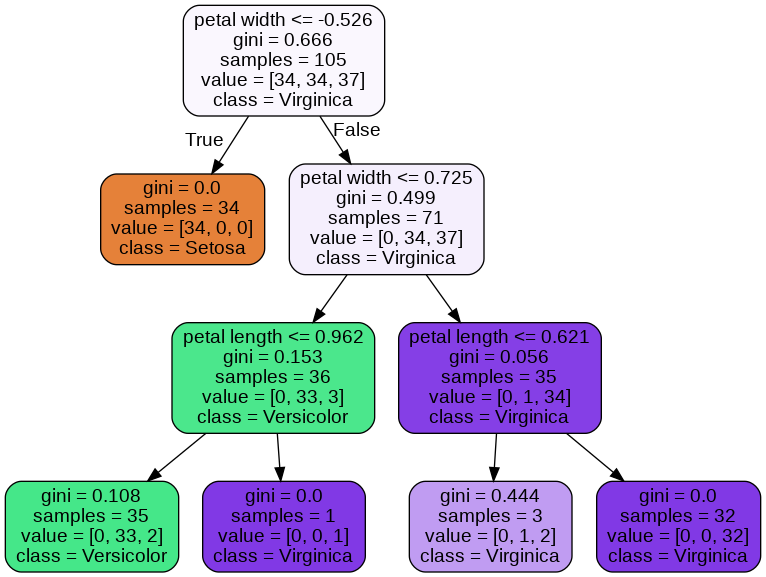

In [6]:
from IPython.display import display_png, Image
display_png(Image('tree.png'))